## An accurate boundary-integral formulation for the calculation of electrostatic forces with an implicit-solvent model

### Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#change plt font size
plt.rcParams.update({'font.size': 14})

## Barnase-Barstar complex

### Figure of binding energy and forces profile for Barnase-Barstar complex at several distances of separation along z-axis

#### Barnase

<Figure size 800x600 with 0 Axes>

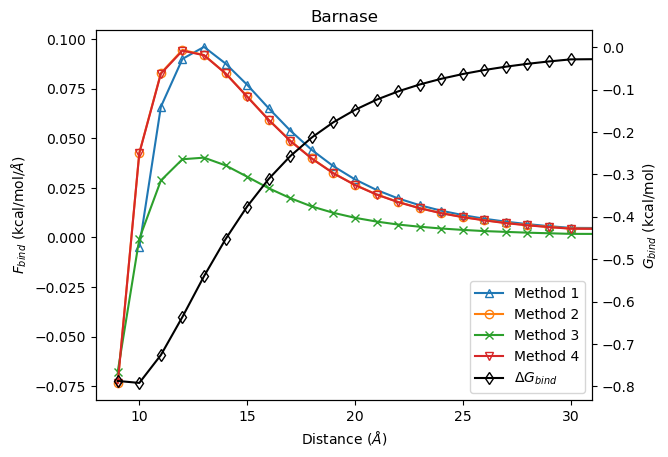

In [2]:
plt.style.use('default')
# read results file
force_terms = np.loadtxt('results_pbj/barnase-barstar_forces_to_latex_mesh8.txt',delimiter='&',skiprows=1)
plt.figure(figsize=(8,6))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

lns1 = ax1.plot(force_terms[1:,0],(force_terms[1:,7]-force_terms[:-1,7])/(force_terms[1:,0]-force_terms[:-1,0]),label='Method 1',marker='^',mfc='none')
lns2 = ax1.plot(force_terms[:,0],force_terms[:,1]-force_terms[-1,1],label='Method 2',marker='o',mfc='none')
lns3 = ax1.plot(force_terms[:,0],force_terms[:,2]-force_terms[-1,2],label='Method 3',marker='x',mfc='none')
lns4 = ax1.plot(force_terms[:,0],force_terms[:,3]-force_terms[-1,3],label='Method 4',marker='v',mfc='none')
lns5 = ax2.plot(force_terms[:,0],force_terms[:,7],label='$\Delta G_{bind}$',marker='d',mfc='none',color='black')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=4)
plt.xlim([8, 31])
ax1.set_xlabel('Distance ($\AA$)')
ax1.set_ylabel('$F_{bind}$ (kcal/mol/$\AA$)')
ax2.set_ylabel('$G_{bind}$ (kcal/mol)')
# ax1.grid()
plt.title('Barnase')
plt.savefig('figures//Barnase_formul_dist.png',dpi=100,bbox_inches='tight')

#### Barstar 

<Figure size 800x600 with 0 Axes>

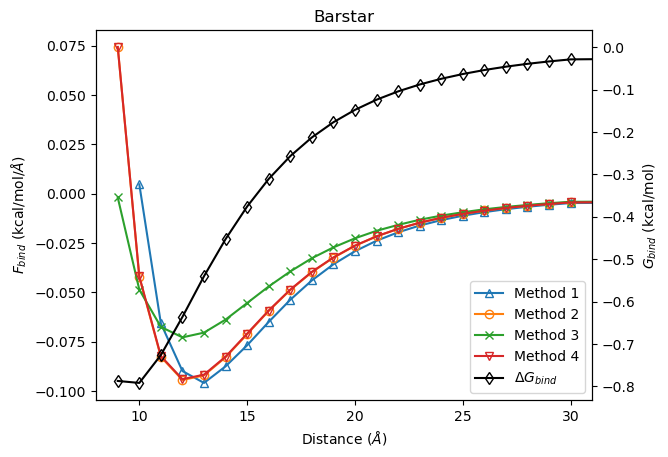

In [3]:
plt.style.use('default')
plt.figure(figsize=(8,6))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

lns1 = ax1.plot(force_terms[1:,0],-(force_terms[1:,7]-force_terms[:-1,7])/(force_terms[1:,0]-force_terms[:-1,0]),label='Method 1',marker='^',mfc='none')
lns2 = ax1.plot(force_terms[:,0],force_terms[:,4]-force_terms[-1,4],label='Method 2',marker='o',mfc='none')
lns3 = ax1.plot(force_terms[:,0],force_terms[:,5]-force_terms[-1,5],label='Method 3',marker='x',mfc='none')
lns4 = ax1.plot(force_terms[:,0],force_terms[:,6]-force_terms[-1,6],label='Method 4',marker='v',mfc='none')
lns5 = ax2.plot(force_terms[:,0],force_terms[:,7],label='$\Delta G_{bind}$',marker='d',mfc='none',color='black')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=4)
plt.xlim([8, 31])
ax1.set_xlabel('Distance ($\AA$)')
ax1.set_ylabel('$F_{bind}$ (kcal/mol/$\AA$)')
ax2.set_ylabel('$G_{bind}$ (kcal/mol)')
# ax1.grid()
plt.title('Barstar')
plt.savefig('figures//Barstar_formul_dist.png',dpi=100,bbox_inches='tight')

### Figure of force terms in z-component along distances

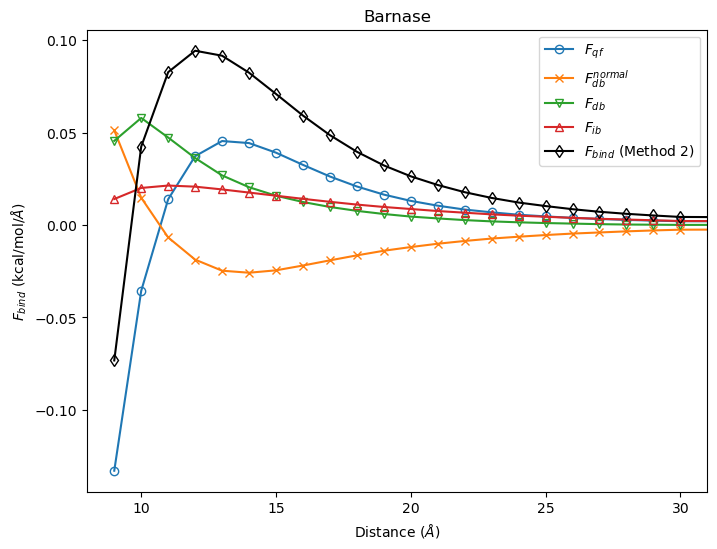

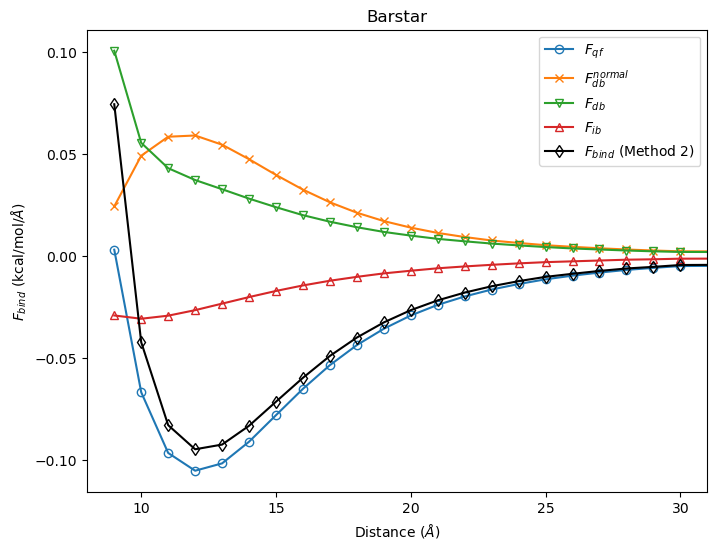

In [4]:
# read results file
force_terms = np.loadtxt('results_pbj//barnase-barstar_forces_terms_to_latex_mesh8.txt',delimiter='&',skiprows=1)

f_bind1 = (force_terms[:,1]+force_terms[:,2]+force_terms[:,4])-(force_terms[-1,1]+force_terms[-1,2]+force_terms[-1,4])
f_bind2 = (force_terms[:,5]+force_terms[:,6]+force_terms[:,8])-(force_terms[-1,5]+force_terms[-1,6]+force_terms[-1,8])

plt.figure(figsize=(8,6))
plt.plot(force_terms[:,0],force_terms[:,1]-force_terms[-1,1],label='$F_{qf}$',marker='o',mfc='none')
plt.plot(force_terms[:,0],force_terms[:,3]-force_terms[-1,3],label='$F_{db}^{normal}$',marker='x',mfc='none')
plt.plot(force_terms[:,0],force_terms[:,2]-force_terms[-1,2],label='$F_{db}$',marker='v',mfc='none')
plt.plot(force_terms[:,0],force_terms[:,4]-force_terms[-1,4],label='$F_{ib}$',marker='^',mfc='none')
plt.plot(force_terms[:,0],f_bind1,label='$F_{bind}$ (Method 2)',marker='d',mfc='none',color='black')
plt.title('Barnase')
plt.xlabel('Distance ($\AA$)')
plt.ylabel('$F_{bind}$ (kcal/mol/$\AA$)')
plt.legend()
plt.xlim([8, 31])
# plt.grid()
plt.savefig('figures//Barnase_terms_dist.png',dpi=100,bbox_inches='tight')

plt.figure(figsize=(8,6))
plt.plot(force_terms[:,0],force_terms[:,5]-force_terms[-1,5],label='$F_{qf}$',marker='o',mfc='none')
plt.plot(force_terms[:,0],force_terms[:,7]-force_terms[-1,7],label='$F_{db}^{normal}$',marker='x',mfc='none')
plt.plot(force_terms[:,0],force_terms[:,6]-force_terms[-1,6],label='$F_{db}$',marker='v',mfc='none')
plt.plot(force_terms[:,0],force_terms[:,8]-force_terms[-1,8],label='$F_{ib}$',marker='^',mfc='none')
plt.plot(force_terms[:,0],f_bind2,label='$F_{bind}$ (Method 2)',marker='d',mfc='none',color='black')
plt.title('Barstar')
plt.xlabel('Distance ($\AA$)')
plt.ylabel('$F_{bind}$ (kcal/mol/$\AA$)')
plt.legend()
plt.xlim([8, 31])
# plt.grid()
plt.savefig('figures//Barstar_terms_dist.png',dpi=100,bbox_inches='tight')

## Two spheres

### Two spheres on several distances: Figure of solvation forces by several grid mesh

<Figure size 800x600 with 0 Axes>

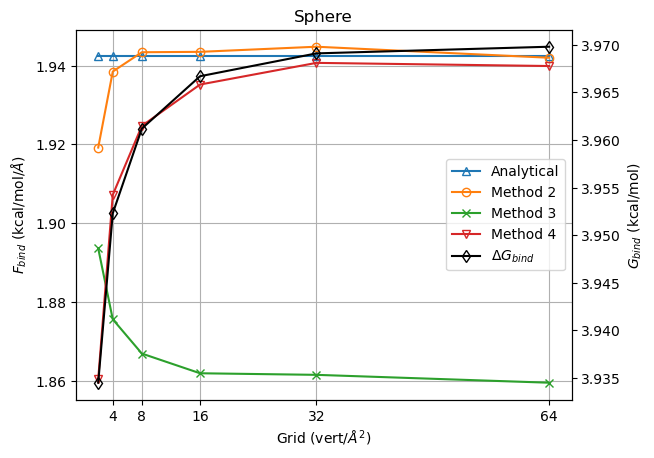

In [5]:
# read results file
force_terms = np.loadtxt('results_pbj\sphere_r1q2_forces_to_latex.txt',delimiter='&',skiprows=1)
plt.figure(figsize=(8,6))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

lns1 = ax1.plot(force_terms[:,0],np.ones(len(force_terms[:,0]))*1.9425,label='Analytical',marker='^',mfc='none')
lns2 = ax1.plot(force_terms[:,0],force_terms[:,2],label='Method 2',marker='o',mfc='none')
lns3 = ax1.plot(force_terms[:,0],force_terms[:,1],label='Method 3',marker='x',mfc='none')
lns4 = ax1.plot(force_terms[:,0],force_terms[:,3],label='Method 4',marker='v',mfc='none')
lns5 = ax2.plot(force_terms[:,0],force_terms[:,4],label='$\Delta G_{bind}$',marker='d',mfc='none',color='black')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='best')
plt.xticks([4,8,16,32,64])
ax1.set_xlabel('Grid (vert/$\AA ^2$)')
ax1.set_ylabel('$F_{bind}$ (kcal/mol/$\AA$)')
ax2.set_ylabel('$G_{bind}$ (kcal/mol)')
ax1.grid()
plt.title('Sphere')
plt.savefig('figures//Sphere_formul_grid2.png',dpi=100,bbox_inches='tight')

### Relative force value over grid refinement

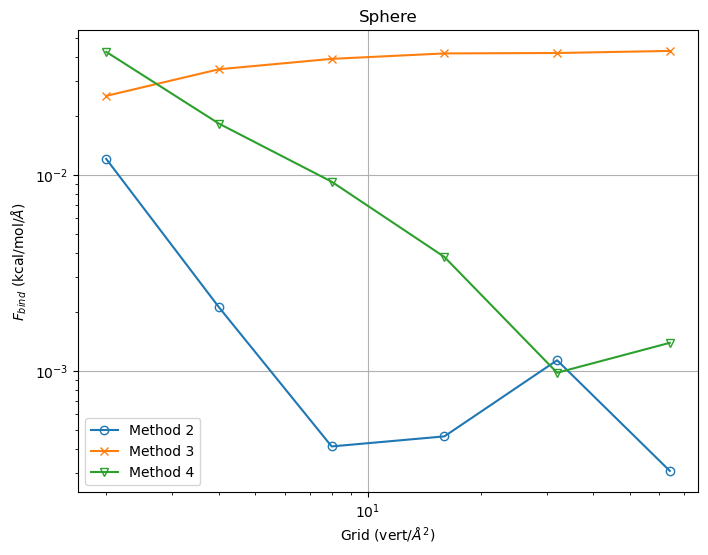

In [6]:
# read results file
def relative_value(x):
    return np.abs(x-1.9425-0.0001)/1.9425

force_terms = np.loadtxt('results_pbj\sphere_r1q2_forces_to_latex.txt',delimiter='&',skiprows=1)
plt.figure(figsize=(8,6))

plt.plot(force_terms[:,0],relative_value(force_terms[:,2]),label='Method 2',marker='o',mfc='none')
plt.plot(force_terms[:,0],relative_value(force_terms[:,1]),label='Method 3',marker='x',mfc='none')
plt.plot(force_terms[:,0],relative_value(force_terms[:,3]),label='Method 4',marker='v',mfc='none')

# added these three lines
plt.legend(loc='best')
plt.xticks([4,8,16,32,64])
plt.xlabel('Grid (vert/$\AA ^2$)')
plt.ylabel('$F_{bind}$ (kcal/mol/$\AA$)')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.title('Sphere')
plt.savefig('figures//Sphere_formul_grid_rel.png',dpi=100,bbox_inches='tight')

### Figure of two spheres separated along x-axis

<Figure size 800x600 with 0 Axes>

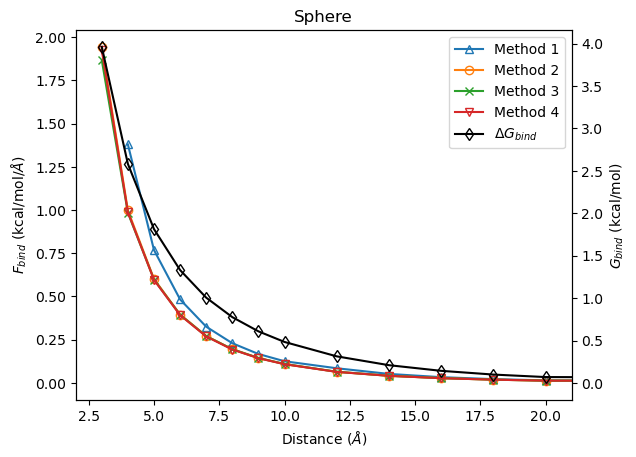

In [7]:
# read results file
force_terms = np.loadtxt('results_pbj\sphere_r1q2_forces_to_latex_dist.txt',delimiter='&',skiprows=1)

plt.style.use('default')
plt.figure(figsize=(8,6))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
lns1 = ax1.plot(force_terms[1:,0],-(force_terms[1:,4]-force_terms[:-1,4])/(force_terms[1:,0]-force_terms[:-1,0]),label='Method 1',marker='^',mfc='none')
lns2 = ax1.plot(force_terms[:,0],force_terms[:,2]-force_terms[-1,2],label='Method 2',marker='o',mfc='none')
lns3 = ax1.plot(force_terms[:,0],force_terms[:,1]-force_terms[-1,1],label='Method 3',marker='x',mfc='none')
lns4 = ax1.plot(force_terms[:,0],force_terms[:,3]-force_terms[-1,3],label='Method 4',marker='v',mfc='none')
lns5 = ax2.plot(force_terms[:,0],force_terms[:,4],label='$\Delta G_{bind}$',marker='d',mfc='none',color='black')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

ax1.set_xlabel('Distance ($\AA$)')
ax1.set_ylabel('$F_{bind}$ (kcal/mol/$\AA$)')
ax2.set_ylabel('$G_{bind}$ (kcal/mol)')
# ax1.grid()
plt.xlim([2, 21])
plt.title('Sphere')
plt.savefig('figures//Sphere_formul_dist.png',dpi=100,bbox_inches='tight')

<Figure size 800x600 with 0 Axes>

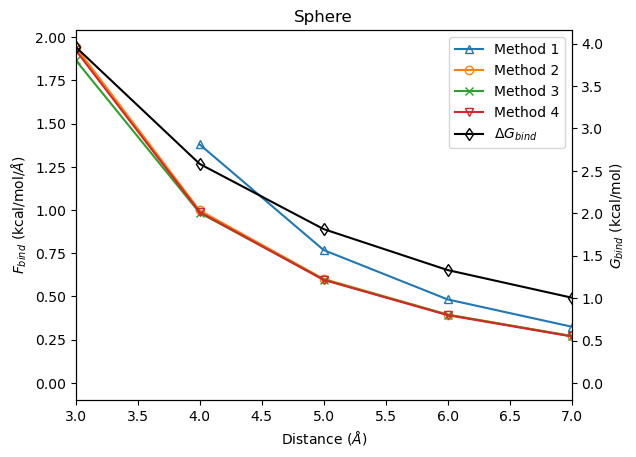

In [8]:
# read results file
force_terms = np.loadtxt('results_pbj\sphere_r1q2_forces_to_latex_dist.txt',delimiter='&',skiprows=1)

plt.style.use('default')
plt.figure(figsize=(8,6))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
lns1 = ax1.plot(force_terms[1:,0],-(force_terms[1:,4]-force_terms[:-1,4])/(force_terms[1:,0]-force_terms[:-1,0]),label='Method 1',marker='^',mfc='none')
lns2 = ax1.plot(force_terms[:,0],force_terms[:,2]-force_terms[-1,2],label='Method 2',marker='o',mfc='none')
lns3 = ax1.plot(force_terms[:,0],force_terms[:,1]-force_terms[-1,1],label='Method 3',marker='x',mfc='none')
lns4 = ax1.plot(force_terms[:,0],force_terms[:,3]-force_terms[-1,3],label='Method 4',marker='v',mfc='none')
lns5 = ax2.plot(force_terms[:,0],force_terms[:,4],label='$\Delta G_{bind}$',marker='d',mfc='none',color='black')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.xlim([3,7])
ax1.set_xlabel('Distance ($\AA$)')
ax1.set_ylabel('$F_{bind}$ (kcal/mol/$\AA$)')
ax2.set_ylabel('$G_{bind}$ (kcal/mol)')
# ax1.grid()
plt.title('Sphere')
plt.savefig('figures//Sphere_formul_dist_zoom.png',dpi=100,bbox_inches='tight')

### Figure of force terms along x-distance between spheres

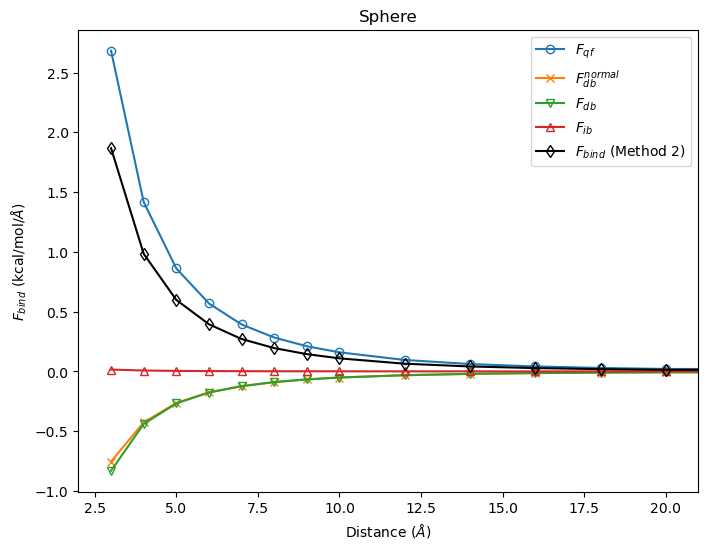

In [9]:
# read results file
force_terms = np.loadtxt('results_pbj\sphere_r1q2_forces_terms_to_latex_dist.txt',delimiter='&',skiprows=1)

f_bind1 = (force_terms[:,1]+force_terms[:,3]+force_terms[:,4])-(force_terms[-1,1]+force_terms[-1,3]+force_terms[-1,4])

plt.figure(figsize=(8,6))
plt.plot(force_terms[:,0],force_terms[:,1]-force_terms[-1,1],label='$F_{qf}$',marker='o',mfc='none')
plt.plot(force_terms[:,0],force_terms[:,2]-force_terms[-1,2],label='$F_{db}^{normal}$',marker='x',mfc='none')
plt.plot(force_terms[:,0],force_terms[:,3]-force_terms[-1,3],label='$F_{db}$',marker='v',mfc='none')
plt.plot(force_terms[:,0],force_terms[:,4]-force_terms[-1,4],label='$F_{ib}$',marker='^',mfc='none')
plt.plot(force_terms[:,0],f_bind1,label='$F_{bind}$ (Method 2)',marker='d',mfc='none',color='black')
plt.title('Sphere')
plt.xlabel('Distance ($\AA$)')
plt.ylabel('$F_{bind}$ (kcal/mol/$\AA$)')
plt.legend()
plt.xlim([2, 21])
# plt.grid()
plt.savefig('figures//sphere_terms_dist.png',dpi=100,bbox_inches='tight')